# Two Simple Models: Linear Regression and Logistic Regression

## Super fast introduction to Neural Network/Deep Learning/Logistic Regression

### Neuron


![Simple Neuron](imgs/simple-neuron.png)
(image from <http://udacity.com>)


__Without Activation__: Linear Regression

__With Activation__: Logistic Regression

### Acivations

![Activations](imgs/activation.png)

(imgage from <https://www.kdnuggets.com/2017/09/neural-network-foundations-explained-activation-function.html>)

### Neural Network

![NN](imgs/nn.png)
(image from <https://medium.com/@curiousily/tensorflow-for-hackers-part-iv-neural-network-from-scratch-1a4f504dfa8>)

### How we train

1. Forward pass: from input calculate an outputs
2. From output + real values calculate loss
3. Backpropagate erros: calculate gradients
4. Update weights
5. Repeat it many times

## Boston dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## We consider just two columns

We take two columns:
* per capita crime rate by town
* % lower status of the population

In [6]:
X = boston.data[:, [0, 12]]
medval = boston.target

Text(0.5,0,"Median value of owner-occupied homes in $1000's")

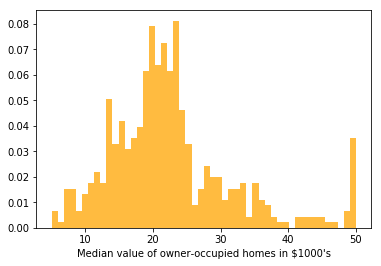

In [7]:
n, bins, patches = plt.hist(medval, 50, normed=1, facecolor='orange', alpha=0.75)
plt.xlabel("Median value of owner-occupied homes in $1000's")

Text(0,0.5,'per capita crime rate by town')

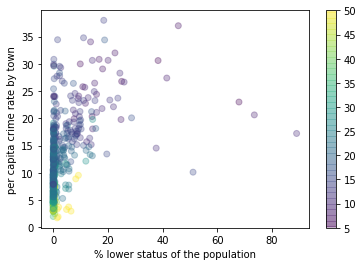

In [8]:
s = plt.scatter(X[:,0], X[:,1], c=medval, alpha=0.3)
plt.colorbar(s)
plt.xlabel("% lower status of the population")
plt.ylabel("per capita crime rate by town")
#plt.xlim(0, 2)

Text(0,0.5,"Median value of owner-occupied homes in $1000's")

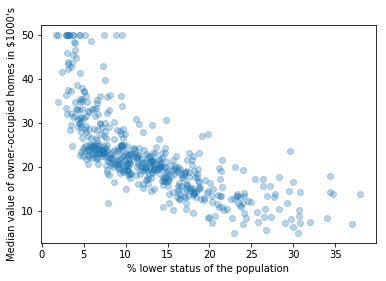

In [9]:
plt.scatter(X[:,1], medval, alpha=0.3)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")

## Linear Regresion

Here the target is __Median value of houses__

In [10]:
# define target:
y = medval

In [11]:
# just to print it nicely
df = pd.DataFrame(X, columns=['CRIM', 'LSTAT'])
df['medval'] = y
df.head()

,CRIM,LSTAT,medval
0,0.00632,4.98,24.0
1,0.02731,9.14,21.6
2,0.02729,4.03,34.7
3,0.03237,2.94,33.4
4,0.06905,5.33,36.2


In [12]:
# translate numpy to torch's objects
X_torch = torch.from_numpy(X).float()
y_torch = torch.tensor(y).float()

### Define Model

In [13]:
# predefined linear model (no activation funcion)
model = nn.Linear(in_features=2, out_features=1, bias=True)

### Yes it is that easy :)

In [14]:
model.weight

Parameter containing:
tensor([[ 0.2511,  0.2501]])

In [15]:
model.bias

Parameter containing:
tensor([-0.1597])

In [16]:
### Choose loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Let's update weights

In [17]:
# Zero gradients (just in case)
optimizer.zero_grad()

# Forward pass, calculate predictions
output = model(X_torch)

__Achtung__ Output is two dimensional so we have to `unsueeze` our target.

In [18]:
output[:5]

tensor([[ 1.0875],
        [ 2.1333],
        [ 0.8551],
        [ 0.5838],
        [ 1.1908]])

In [19]:
y_torch.unsqueeze(1)[:5]

tensor([[ 24.0000],
        [ 21.6000],
        [ 34.7000],
        [ 33.4000],
        [ 36.2000]])

#### Calculate loss

In [20]:
loss = criterion(output, y_torch.unsqueeze(1))

#### Weights before

In [21]:
model.weight

Parameter containing:
tensor([[ 0.2511,  0.2501]])

#### Weights after

In [22]:
## Backward propagation
loss.backward()
model.weight.grad

tensor([[ -22.0784, -335.2562]])

In [23]:
## Upade weights
optimizer.step()
model.weight

Parameter containing:
tensor([[ 0.2611,  0.2601]])

## Logistic Regression

In [24]:
y = medval > 25 # if a 

In [25]:
# just for showing data
df = pd.DataFrame(X, columns=['CRIM', 'LSTAT'])
df['expensive'] = y
df.head()

,CRIM,LSTAT,expensive
0,0.00632,4.98,False
1,0.02731,9.14,False
2,0.02729,4.03,True
3,0.03237,2.94,True
4,0.06905,5.33,True


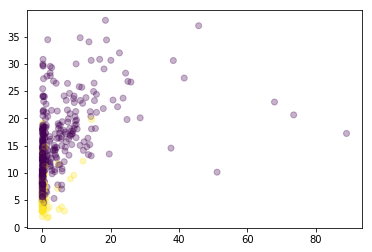

In [26]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
#plt.xlim(0, 2)

## Logistic regression: the simples NN

In [27]:
X_torch = torch.from_numpy(X).float()
y_torch = torch.tensor(y.astype(float)).float()

In [28]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc', nn.Linear(in_features=2, out_features=1, bias=True)),
                      ('sigmoid', nn.Sigmoid())]))

In [29]:
model.fc.weight

Parameter containing:
tensor([[ 0.3071, -0.0455]])

In [30]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [31]:
## zero gradients
optimizer.zero_grad()

In [32]:
## forward pass
output = model.forward(X_torch[:32, :])

In [33]:
## calculate loss
loss = criterion(output, y_torch[:32].unsqueeze(1))

In [34]:
## backward propagation
loss.backward()
model.fc.weight.grad

tensor([[ 0.2058,  3.5118]])

In [35]:
## updating weights
optimizer.step()

In [36]:
model.fc.weight

Parameter containing:
tensor([[ 0.2071, -0.1455]])